<a href="https://colab.research.google.com/github/surtweig/kpi-assignments/blob/master/reliability/reliability_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Входные данные

In [1]:
mtbf_exponential = [ 48 , 168, 54 , 178, 133, 269, 405, 49 , 17 , 29 , 23 , 14 , 312, 292, 58 , 811, 144, 18 , 424, 557, 239, 558, 391, 268, 47 , 198, 39 , 56 , 163, 379, 126, 504, 154, 20 , 7  , 372, 131, 38 , 69 , 63 , 6  , 173, 2  , 23 , 316, 31 , 647, 193, 104, 251, 34 , 259, 57 , 172, 433, 294, 123, 38 , 386, 69 , 408, 79 , 110, 72 , 38 , 113, 54 , 16 , 90 , 455, 140, 216, 316, 177, 56 , 895, 171, 77 , 637, 578, 165, 144, 96 , 64 , 92 , 145, 150, 234, 74 , 608, 190, 214, 41 , 168, 110, 52 , 207, 12 , 15 , 56 ]
mtbf_gamma = [142, 146, 120, 148, 134, 130, 145, 177, 139, 139, 144, 151, 147, 139, 141, 142, 138, 143, 131, 166, 154, 136, 149, 142, 123, 161, 152, 161, 159, 163, 161, 134, 155, 141, 141, 158, 140, 142, 138, 150, 137, 144, 159, 134, 153, 151, 157, 170, 144, 150, 130, 150, 141, 156, 151, 151, 144, 144, 139, 137, 158, 145, 128, 146, 167, 147, 140, 153, 137, 147, 166, 156, 147, 164, 157, 143, 153, 143, 162, 159, 152, 153, 164, 165, 148, 143, 161, 147, 138, 129, 153, 130, 156, 147, 136, 154, 157, 133, 159, 134]
mtbf_uniform = [84 , 226, 547, 124, 452, 494, 34 , 332, 304, 536, 493, 130, 113, 513, 80 , 467, 375, 189, 243, 436, 419, 367, 474, 457, 175, 539, 192, 300, 543, 353, 6  , 100, 92 , 346, 442, 348, 124, 186, 81 , 201, 395, 387, 80 , 44 , 283, 387, 283, 59 , 138, 326, 371, 485, 503, 368, 138, 105, 454, 271, 479, 524, 497, 279, 133, 23 , 264, 185, 38 , 494, 556, 96 , 165, 431, 308, 214, 518, 398, 330, 477, 22 , 70 , 424, 196, 183, 315, 336, 227, 112, 79 , 233, 518, 308, 405, 273, 56 , 62 , 427, 162, 284, 444, 306]
mtbf_normal = [129, 322, 249, 213, 274, 329, 237, 212, 244, 140, 369, 370, 287, 201, 255, 318, 155, 314, 313, 211, 209, 174, 325, 431, 469, 292, 296, 314, 263, 97 , 226, 312, 129, 178, 167, 74 , 279, 161, 242, 217, 302, 333, 229, 186, 247, 35 , 184, 277, 259, 352, 91 , 155, 135, 273, 119, 192, 139, 451, 241, 255, 139, 292, 228, 172, 323, 227, 409, 388, 308, 183, 286, 183, 273, 175, 235, 296, 325, 269, 258, 66 , 342, 196, 305, 239, 113, 63 , 63 , 317, 253, 278, 200, 130, 254, 294, 138, 229, 196, 369, 307, 223]

mtbf_dataset = {"exponential":mtbf_exponential, "gamma":mtbf_gamma, "normal":mtbf_normal, "uniform":mtbf_uniform}

### Гистограммы входных данных

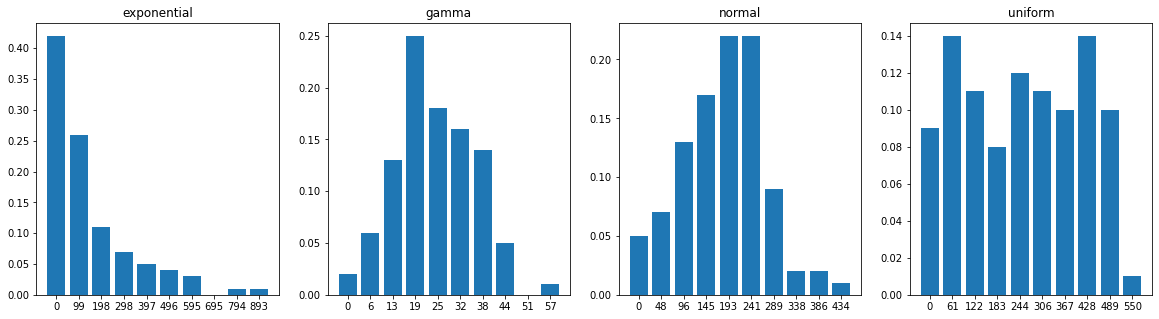

In [2]:
def hist_grid(data, xmin, step, count):
    h = [0]*count

    for i in range(len(data)):
        h[int( (data[i]-xmin)/step )] += 1
    for i in range(count):
        h[i] /= len(data)

    x = [0]*count
    for i in range(count):
        x[i] = str(round(step*i))
    return (x, h)

def hist(data, count):
    xmin = min(data)
    xmax = max(data)
    step = (xmax-xmin)/(count-1)
    return hist_grid(data, xmin, step, count)

def drawHistogram(data, title = "", rv = None):
    import matplotlib.pyplot as plt
    import numpy
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    histX, histY = hist(data, 10) #hist_grid(data, 0, 100, 10)
    ax.bar(histX,histY)
    if rv:
        rvx = numpy.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
        ax.plot(rvx, rv.pdf(rvx), 'r-', lw=5)
        #x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
        #ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='genexpon pdf')        
    ax.set_title(title)
    plt.show()

def drawDataSet(dataSet):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(len(dataSet)*5, 5))
    plt.plot(1, len(dataSet))
    i = 1
    for k, v in dataSet.items():
        ax = plt.subplot(1, len(dataSet), i)
        ax.bar(v[0], v[1])
        ax.set_title(k)        
        i += 1
    plt.show()

def drawHistogramsDataSet(dataSet, count):
    histDataSet = dict([(k, hist(v, count)) for k,v in dataSet.items()])
    drawDataSet(histDataSet)


drawHistogramsDataSet(mtbf_dataset, 10)
#drawHistogram(mtbf_exponential, "exponential")
#drawHistogram(mtbf_gamma, "gamma")
#drawHistogram(mtbf_uniform, "uniform")
#drawHistogram(mtbf_normal, "normal")


### Среднее и дисперсия времени наработки на отказ

In [3]:
def average(data):
    avg = 0
    for x in data:
        avg += x
    avg /= len(data)
    return avg

def averageAndVariance(data):
    avg = average(data)
    var = 0
    for x in data:
        var += (x-avg)**2
    var /= len(data)
    return avg, var

def avgAndVarDataSet(dataSet):
    from math import sqrt
    for title, data in dataSet.items():
        avg, var = averageAndVariance(data)

        print("{0} average = {1:.2f}, variance = {2:.2f}, mse = {3:.2f}".format(title, avg, var, sqrt(var)))

avgAndVarDataSet(mtbf_dataset)

exponential average = 189.71, variance = 34700.51, mse = 186.28
gamma average = 147.41, variance = 120.38, mse = 10.97
normal average = 239.96, variance = 7762.84, mse = 88.11
uniform average = 288.45, variance = 25784.93, mse = 160.58


### Вероятность отказа и вероятность безотказной работы

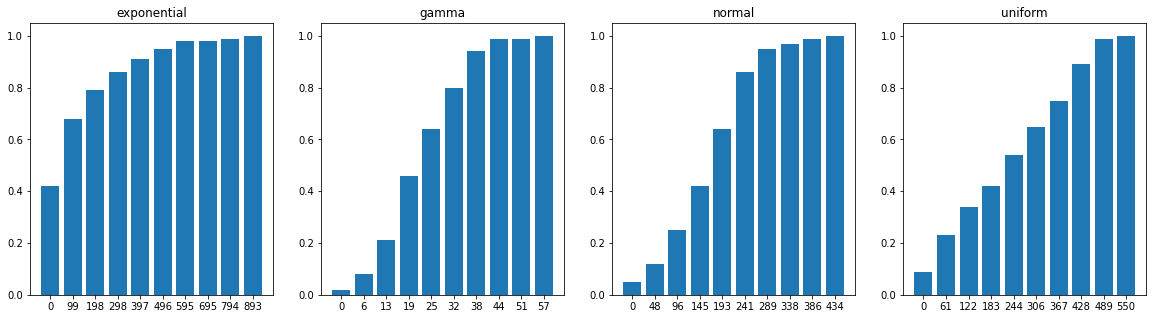

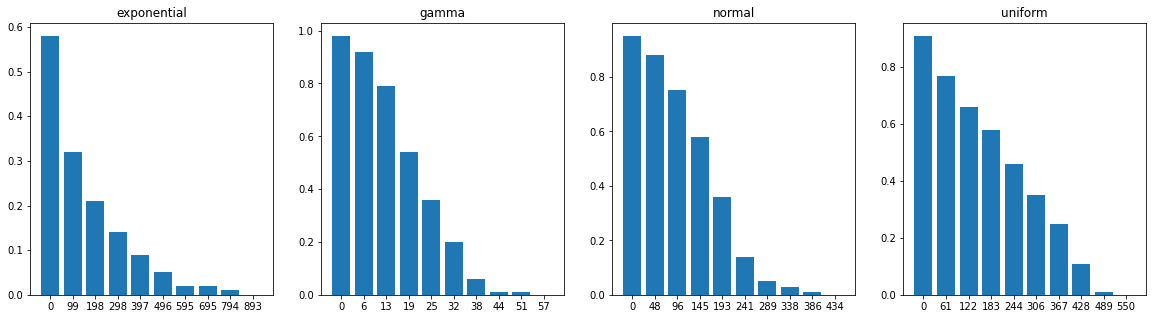

In [4]:
def cumulative(histogram):
    #total = sum(histogram[1])
    c = (histogram[0], [])
    accum = 0
    for i in range(len(histogram[1])):
        accum += histogram[1][i]
        c[1].append(accum)
    return c

def inverse(c):
    inv = (c[0], [])
    for i in range(len(c[1])):
        inv[1].append(1-c[1][i])
    return inv

def drawCumulativeDataSet(dataSet, count):
    histDataSet = dict([(k, hist(v, count)) for k,v in dataSet.items()])
    cumulativeDataSet = dict([(k, cumulative(v)) for k,v in histDataSet.items()])
    inverseDataSet = dict([(k, inverse(v)) for k,v in cumulativeDataSet.items()])
    drawDataSet(cumulativeDataSet)
    drawDataSet(inverseDataSet)
    #print(inverseDataSet)

drawCumulativeDataSet(mtbf_dataset, 10)

### χ2 тест

In [26]:
def fitUniform(data):
    from scipy.stats import uniform
    loc, scale = uniform.fit(data)
    return uniform(loc, scale)

def fitNormal(data):
    from scipy.stats import norm
    mean, std = norm.fit(data)
    return norm(mean, std)

def fitGamma(data):
    from scipy.stats import gamma
    fit_alpha, fit_loc, fit_beta = gamma.fit(mtbf_gamma)
    return gamma(fit_alpha, loc=fit_loc, scale=fit_beta)

def fitExponential(data):
    from scipy.stats import genexpon
    a, b, c, loc, scale = genexpon.fit(data)
    return genexpon(a, b, c, loc=loc, scale=scale)

def chi2test(dataName, data, distrName, distr):
    import numpy as np
    from scipy.stats import chisquare
    #expected = distr.rvs(size=len(data))
    expected, bin_edges = np.histogram(data, bins=10, density=True)
    x = np.linspace(distr.ppf(0.01), distr.ppf(0.99), 10)
    observed = distr.pdf(x)#[distr.pdf(xx) for xx in x]
    chi2 = chisquare(f_obs=observed, f_exp=expected)
    if dataName == distrName:
        import matplotlib.pyplot as plt
        fig=plt.figure()
        plt.plot(x, observed)
        plt.plot(x, expected)
    print("{0} data vs theoretical {1}: chi2 = {2}, p-value = {3}".format(dataName, distrName, chi2.statistic, chi2.pvalue))

def drawHistAndPDFComparison(name, data, distr):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(distr.ppf(0.01), distr.ppf(0.99), 100)
    ax.plot(x, distr.pdf(x), 'r-', lw=5, alpha=0.6, label='pdf')
    ax.hist(data, density=True, histtype='stepfilled', alpha=0.2)
    plt.show()

def drawHistAndPDFComparisonDataSet(dataSet, distrSet):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(len(dataSet)*5, 5))
    plt.plot(1, len(dataSet))
    i = 1
    for k, v in dataSet.items():
        ax = plt.subplot(1, len(dataSet), i)
        #ax.bar(v[0], v[1])
        distr = distrSet[k]
        data = v
        x = np.linspace(distr.ppf(0.01), distr.ppf(0.99), 100)
        ax.plot(x, distr.pdf(x), 'r-', lw=5, alpha=0.6, label='pdf')
        ax.hist(data, density=True, histtype='stepfilled', alpha=0.2)        
        ax.set_title(k)        
        i += 1
    plt.show()    
    

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


exponential data vs theoretical uniform: chi2 = inf, p-value = 0.0
exponential data vs theoretical normal: chi2 = inf, p-value = 0.0
exponential data vs theoretical gamma: chi2 = inf, p-value = 0.0
exponential data vs theoretical exponential: chi2 = inf, p-value = 0.0
gamma data vs theoretical uniform: chi2 = 0.24034508090235626, p-value = 0.9999987479030671
gamma data vs theoretical normal: chi2 = 0.003959803464218358, p-value = 0.999999999999987
gamma data vs theoretical gamma: chi2 = 0.0022456517572041284, p-value = 0.999999999999999
gamma data vs theoretical exponential: chi2 = 0.21932510808536662, p-value = 0.9999991634356065
normal data vs theoretical uniform: chi2 = 0.018582712191734744, p-value = 0.9999999999863793
normal data vs theoretical normal: chi2 = 0.002088388239911229, p-value = 0.9999999999999992
normal data vs theoretical gamma: chi2 = 1.1098752825294487, p-value = 0.9991397308126774
normal data vs theoretical exponential: chi2 = 0.030402102645351252, p-value = 0.999

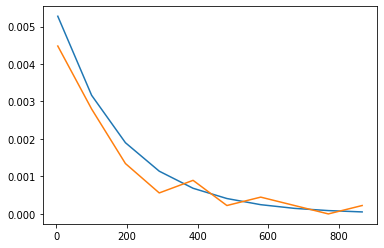

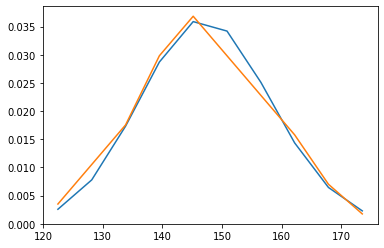

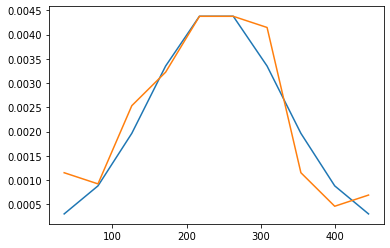

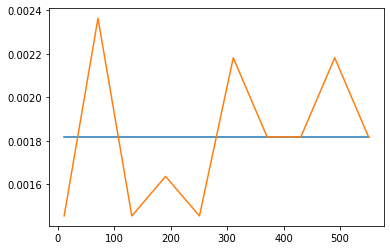

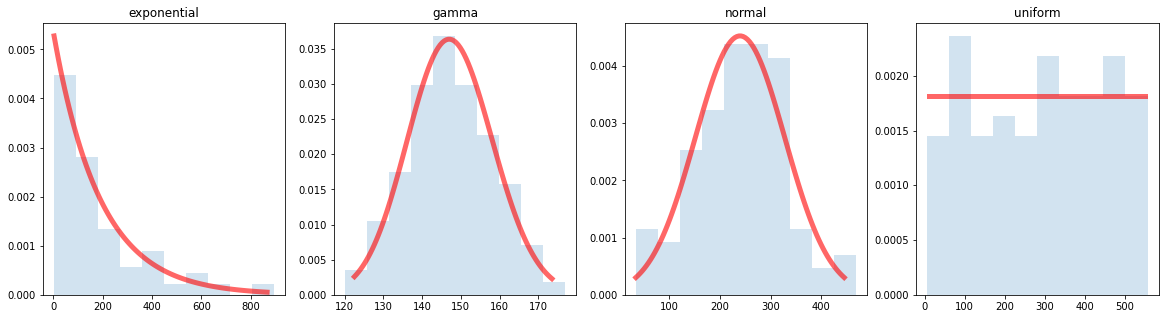

In [27]:
def chi2testDataSet(dataSet):
    for title, data in dataSet.items():
        d_uniform = fitUniform(data)
        chi2test(title, data, "uniform", d_uniform)
        d_normal = fitNormal(data)
        chi2test(title, data, "normal", d_normal)
        d_gamma = fitGamma(data)
        chi2test(title, data, "gamma", d_gamma)
        d_exp = fitExponential(data)
        chi2test(title, data, "exponential", d_exp)

chi2testDataSet(mtbf_dataset)
drawHistAndPDFComparisonDataSet(mtbf_dataset, {"uniform":fitUniform(mtbf_uniform), "normal":fitNormal(mtbf_normal), "gamma":fitGamma(mtbf_gamma), "exponential":fitExponential(mtbf_exponential)})
#drawHistAndPDFComparison("uniform", mtbf_uniform, fitUniform(mtbf_uniform))
#drawHistAndPDFComparison("normal", mtbf_normal, fitNormal(mtbf_normal))
#drawHistAndPDFComparison("gamma", mtbf_gamma, fitGamma(mtbf_gamma))
#drawHistAndPDFComparison("exponential", mtbf_exponential, fitExponential(mtbf_exponential))
        

In [ ]:
from scipy.stats import gamma

fit_alpha, fit_loc, fit_beta = gamma.fit(mtbf_gamma)
print(fit_alpha, fit_loc, fit_beta)
expected_data = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=len(mtbf_gamma))
gammaDataSet = {"observed":mtbf_gamma, "expected":expected_data}
drawHistogramsDataSet(gammaDataSet, 10)

from scipy.stats import norm
print("normal:", norm.fit(mtbf_normal))

from scipy.stats import genexpon
print("exponential:", genexpon.fit(mtbf_exponential))

from scipy.stats import uniform
print(uniform.fit(mtbf_uniform))
distr = uniform(6, 550)
print("uniform:", distr)
#drawHistogram(mtbf_uniform, "uniform", distr)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(distr.ppf(0.01),
                distr.ppf(0.99), 100)
ax.plot(x, distr.pdf(x),
       'r-', lw=5, alpha=0.6, label='genexpon pdf')
ax.hist(mtbf_uniform, density=True, histtype='stepfilled', alpha=0.2)
plt.show()


In [ ]:
import numpy as np
from scipy.stats import genexpon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a, b, c = 9.13, 16.2, 3.28
mean, var, skew, kurt = genexpon.stats(a, b, c, moments='mvsk')
distr = genexpon(a,b,c)
print(distr)
x = np.linspace(distr.ppf(0.01),
                distr.ppf(0.99), 100)
ax.plot(x, distr.pdf(x),
       'r-', lw=5, alpha=0.6, label='genexpon pdf')